In [95]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso 


/var/folders/2g/lgqxddy17rb530lgfvfz7dl40000gn/T/ipykernel_36067/3401098865.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain = imread('../reference_material/oslo.tif')


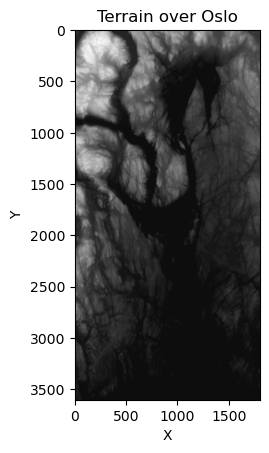

In [96]:
# Load the terrain
terrain = imread('../reference_material/oslo.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Oslo')
plt.imshow(terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [97]:
def create_X(x, y, n):
    """Returns the design matrix X from coordinates x and y with n polynomial degrees."""
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int(i * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x**(i - k)) * (y**k)

    return X

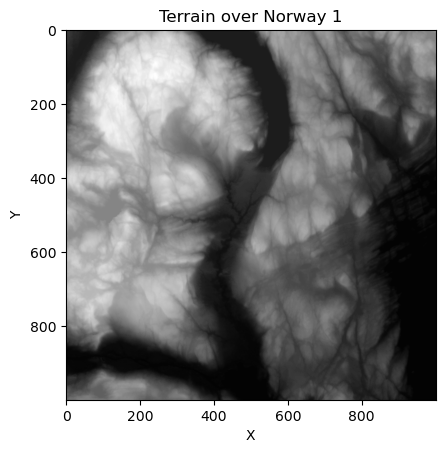

In [90]:
"""Extracting a square piece of the terrain"""

N = 1000
m = 5 # polynomial order
#terrain = terrain[:N,N:]
terrain = terrain[0:N,0:N]
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain
X = create_X(x_mesh, y_mesh,m)


# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Text(0, 0.5, '$R^2$')

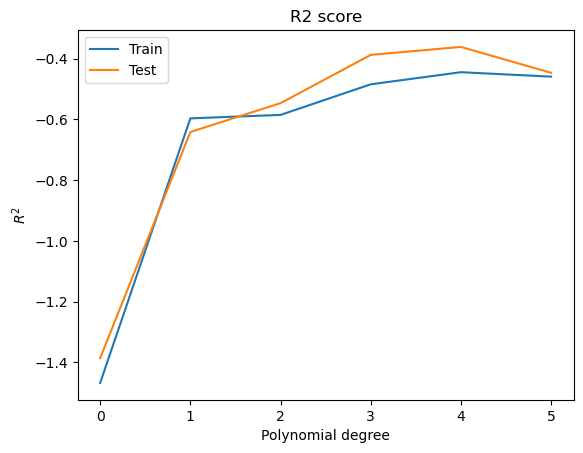

In [93]:
# Plot R2 scores as function of poly. degree 
plt.figure()
plt.plot(degrees, train_r2, label="Train")
plt.plot(degrees, test_r2, label="Test")
plt.legend()
plt.title("R2 score")
plt.xlabel("Polynomial degree")
plt.ylabel("$R^2$")
#plt.savefig(FIGURES_DIR / "part_a_R2.png")

Text(0, 0.5, '$\\beta_i$')

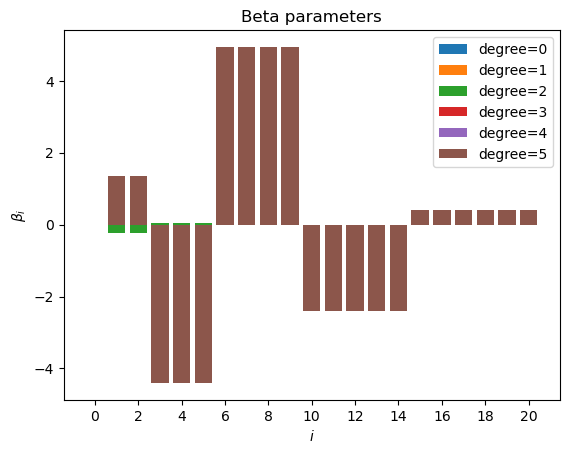

In [94]:
# Now plot the beta parameters 
plt.figure()
for degree in degrees:
    plt.bar(
            range(beta_arr[degree].size),  # indices
            beta_arr[degree],
            label=f"{degree=}",
    )
plt.legend()
plt.xticks(np.arange(plt.xlim()[1], step=2))
plt.title("Beta parameters")
plt.xlabel("$i$")
plt.ylabel(r"$\beta_i$")
#plt.savefig(FIGURES_DIR / "part_a_beta_params.png")

#Implementing terrain data in task b)